# Alpha Diversity Analysis

In [1]:
library("dplyr")
library("gridExtra")
library("plotrix")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Opening the file with alpha diversity metric Faiths PD and Observed OTUs
sigtab = read.csv("adiv_pd.txt",sep = "\t", row.names = 1)
sigtab = as.data.frame.matrix(sigtab) 
sigtab$Time = as.factor(sigtab$Time)
sigtab

,PD_whole_tree,chao1,observed_otus,Time,Treat,individual
,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>
340.T0,57.31418,966.0224,703,0,Placebo,340.T0
341.T0,52.58976,911.0000,624,0,Placebo,341.T0
342.T0,60.11391,985.9444,730,0,Placebo,342.T0
344.T0,55.92928,929.0000,706,0,Placebo,344.T0
345.T0,51.94675,945.1531,625,0,Placebo,345.T0
347.T0,46.57844,822.9375,546,0,Placebo,347.T0
348.T0,49.94521,914.0000,613,0,Placebo,348.T0
349.T0,58.30545,983.3557,736,0,Placebo,349.T0
351.T0,56.38162,925.0794,664,0,Letrozole,351.T0


In [3]:
# Converting the Metric columns to numeric
sigtab$PD_whole_tree = as.numeric(sigtab$PD_whole_tree)
sigtab$observed_otus = as.numeric(sigtab$observed_otus)
sigtab$Time = as.numeric(sigtab$Time)

In [5]:
# Subset the PLacebo and Letrozole groups
placebo = subset(sigtab, Treat != 'Letrozole')
letrozole = subset(sigtab, Treat != 'Placebo')


	Shapiro-Wilk normality test

data:  placebo$PD_whole_tree
W = 0.96641, p-value = 0.1829



	Shapiro-Wilk normality test

data:  placebo$observed_otus
W = 0.96282, p-value = 0.1312


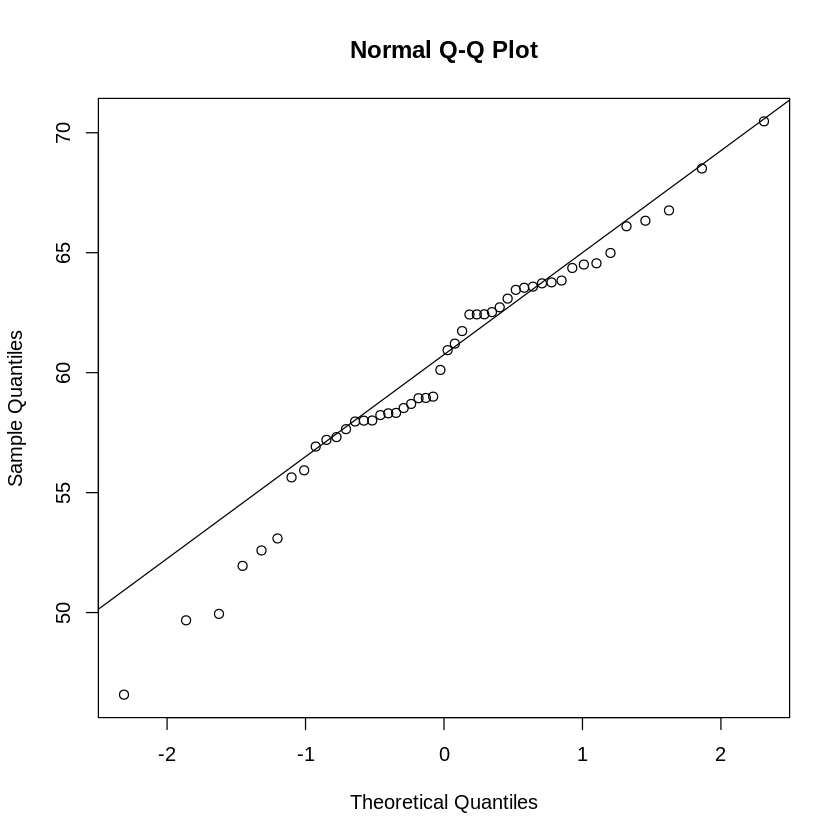


	Shapiro-Wilk normality test

data:  letrozole$PD_whole_tree
W = 0.95526, p-value = 0.06495


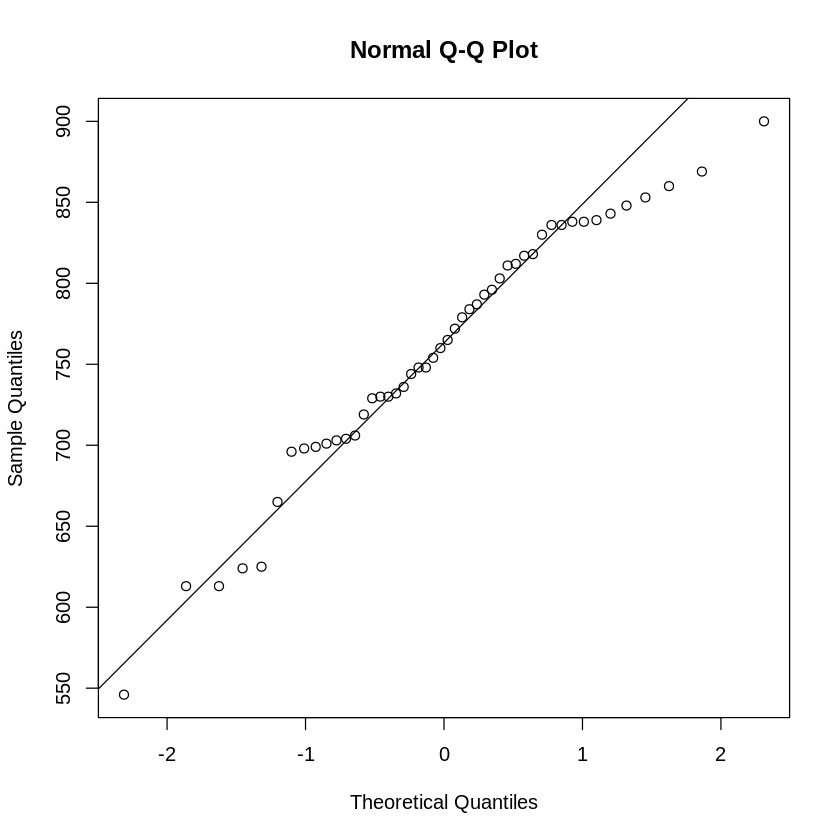


	Shapiro-Wilk normality test

data:  letrozole$observed_otus
W = 0.96903, p-value = 0.2322


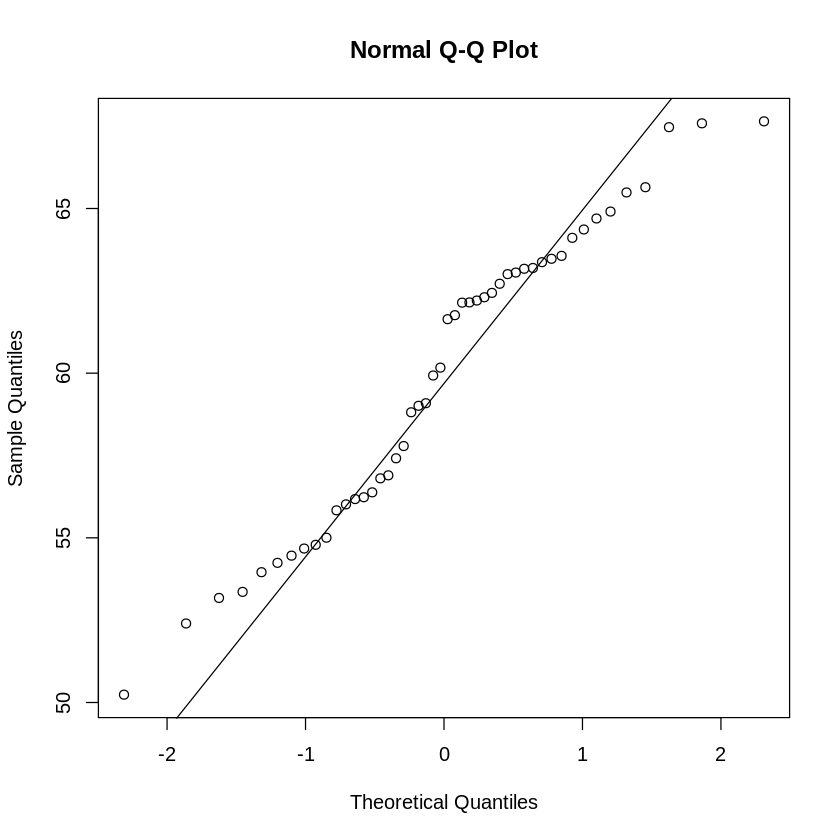

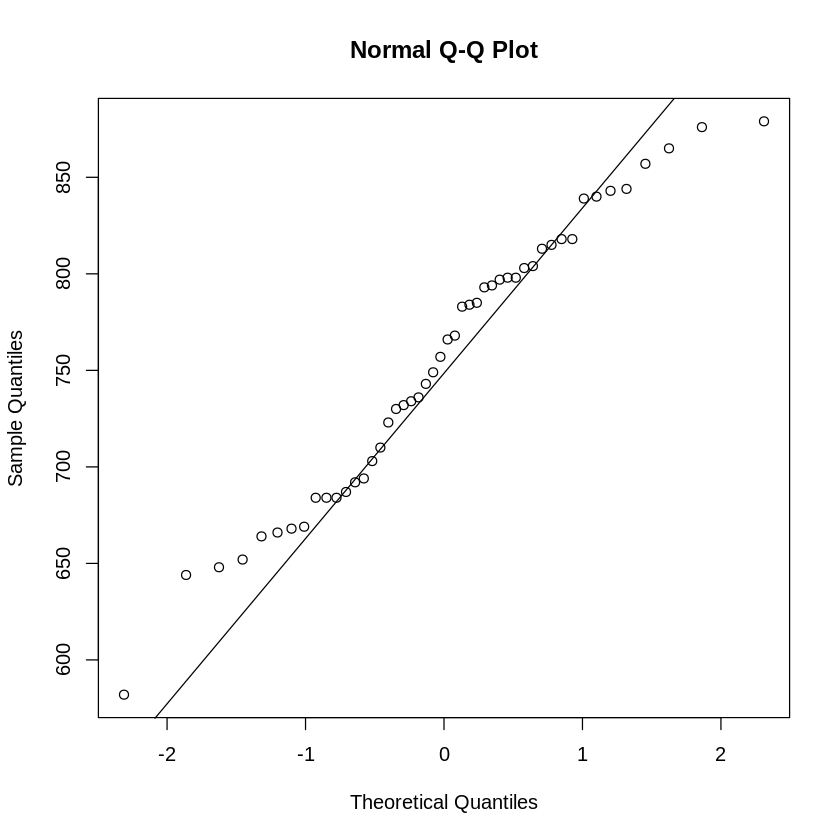

In [11]:
shapiro.test(placebo$PD_whole_tree) #reject null hypothesis that data is normally distributed
qqnorm(placebo$PD_whole_tree)
qqline(placebo$PD_whole_tree)

shapiro.test(placebo$observed_otus) #reject null hypothesis that data is normally distributed
qqnorm(placebo$observed_otus)
qqline(placebo$observed_otus)

shapiro.test(letrozole$PD_whole_tree) #reject null hypothesis that data is normally distributed
qqnorm(letrozole$PD_whole_tree)
qqline(letrozole$PD_whole_tree)

shapiro.test(letrozole$observed_otus) #reject null hypothesis that data is normally distributed
qqnorm(letrozole$observed_otus)
qqline(letrozole$observed_otus)

## Pearsons Correlations

In [9]:
print("Faith's PD for placebo")
print("#p value is 0.0004874  #r value is 0.4842651")
cor.test(x = placebo$PD_whole_tree, y = placebo$Time, method="pearson")

print("Faith's PD for letrozole")
print("#p value is 0.4075 #r value is 0.1233569")
cor.test(x = letrozole$PD_whole_tree, y = letrozole$Time, method="pearson")

print("Observed Otus for placebo")
print("#p value is 0.001  #r value is 0.446127")
cor.test(x = placebo$observed_otus, y = placebo$Time, method="pearson")

print("Observed Otus for letrozole")
print("#p value is 0.033 #r value is 0.3079911")
cor.test(x = letrozole$observed_otus, y = letrozole$Time, method="pearson")

[1] "Faith's PD for placebo"
[1] "#p value is 0.0004874  #r value is 0.4842651"



	Pearson's product-moment correlation

data:  placebo$PD_whole_tree and placebo$Time
t = 3.754, df = 46, p-value = 0.0004874
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2320612 0.6754590
sample estimates:
      cor 
0.4842651 


[1] "Faith's PD for letrozole"
[1] "#p value is 0.4075 #r value is 0.1233569"



	Pearson's product-moment correlation

data:  letrozole$PD_whole_tree and letrozole$Time
t = 0.84309, df = 46, p-value = 0.4035
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1666177  0.3936927
sample estimates:
      cor 
0.1233569 


[1] "Observed Otus for placebo"
[1] "#p value is 0.001  #r value is 0.446127"



	Pearson's product-moment correlation

data:  placebo$observed_otus and placebo$Time
t = 3.3809, df = 46, p-value = 0.001482
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1855073 0.6481075
sample estimates:
     cor 
0.446127 


[1] "Observed Otus for letrozole"
[1] "#p value is 0.033 #r value is 0.3079911"



	Pearson's product-moment correlation

data:  letrozole$observed_otus and letrozole$Time
t = 2.1956, df = 46, p-value = 0.0332
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02614428 0.54447798
sample estimates:
      cor 
0.3079911 


In [13]:
print("#For faith's PD placebo")
placebo_aov_PD <- aov(placebo$PD_whole_tree ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_PD) #P = 0.00369

print("#For observed Otu placebo")
placebo_aov_otu <- aov(placebo$observed_otus ~ factor(placebo$Time) + Error(placebo$individual),data=placebo)
summary(placebo_aov_otu) #P = 0.00135 **

print("#For faith's PD letrozole")
letrozole_aov_PD <- aov(letrozole$PD_whole_tree ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_PD) #P = 0.411

print("#For observed Otu letrozole")
letrozole_aov_otu <- aov(letrozole$observed_otus ~ factor(letrozole$Time) + Error(letrozole$individual),data=letrozole)
summary(letrozole_aov_otu) #P = 0.126

[1] "#For faith's PD placebo"



Error: placebo$individual
                     Df Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5  385.9   77.18    4.16 0.00369 **
Residuals            42  779.2   18.55                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For observed Otu placebo"



Error: placebo$individual
                     Df Sum Sq Mean Sq F value  Pr(>F)   
factor(placebo$Time)  5 103796   20759   4.861 0.00135 **
Residuals            42 179382    4271                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "#For faith's PD letrozole"



Error: letrozole$individual
                       Df Sum Sq Mean Sq F value Pr(>F)
factor(letrozole$Time)  5  105.5   21.10   1.034  0.411
Residuals              42  857.5   20.42               

[1] "#For observed Otu letrozole"



Error: letrozole$individual
                       Df Sum Sq Mean Sq F value Pr(>F)
factor(letrozole$Time)  5  43846    8769   1.839  0.126
Residuals              42 200262    4768               

## Plotting our models

In [26]:
e <- ggplot(data = placebo, aes(x = Time, y = PD_whole_tree, ymin = 50, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 10, ymax = 50), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 30 ,label = "LM: r = 0.484\np = <0.001\n RM-ANOVA\n p= 0.003") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Placebo")

f <- ggplot(data = letrozole, aes(x = Time, y = PD_whole_tree, ymin = 50, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 10, ymax = 50), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 30 ,label = "LM: r = 0.123\np = 0.407\n RM-ANOVA\n p= 0.411") +
    theme_classic() +
    xlab("Week") + ylab("Diveristy (Faith's PD)") + ggtitle("Letrozole")

g <- ggplot(data = placebo, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.446\np = 0.001\n RM-ANOVA\n p= 0.001") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Placebo")

h <- ggplot(data = letrozole, aes(x = Time, y = observed_otus, ymin = 80, ymax = 130 )) + 
    geom_point() +
    geom_rect(aes(xmin = 3, xmax = 5, ymin = 60, ymax = 500), color = "black", fill = "white") +
    stat_smooth(method = "lm", col = "black") + #This is how you get that nice linear line to form
    annotate("text", size = 3, x= 4, y = 272.5 ,label = "LM: r = 0.302\np = 0.033\n RM-ANOVA\n p= 0.123") +
    theme_classic() +
    xlab("Week") + ylab("Observed OTUs") + ggtitle("Letrozole")

In [27]:
pdf("pdf_alpha_new.pdf", width = 8, height = 8) # Open a new pdf file
grid.arrange(e, f, g, h , nrow = 2)
dev.off() # Close the file

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

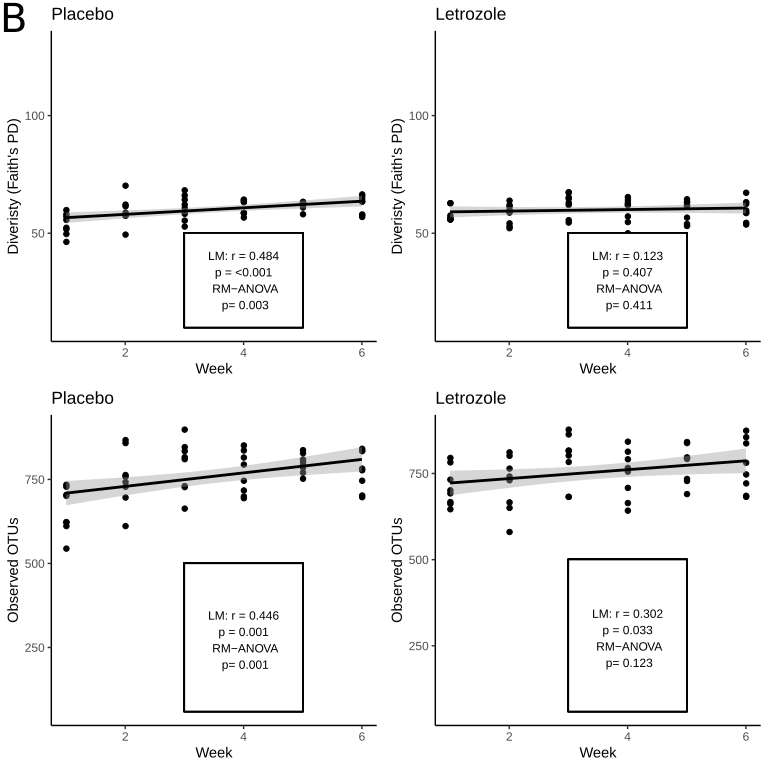